# Design ATM Machine
- An ATM system is designed to efficiently handle customer banking operations, authenticate users, process trasactions, and maange cash inventory. The system needs to support multiple transaction types, maintain security, handle various states of operation, and provide a seamless use experience. The system should be reliable and capable of handling different machine states and trasaction processing.
## Rules of the System
- Setup:
    - The ATN has a cash inventory with differen denominations
    - Cards have attributes like card number, PIN, and associated account details.
    - The system authenticates users before allowing access to their accounts.
- Operation
    - Users insert their cards and enter their PIN for authentication.
    - The ATM has several states: idle, has card, select operation, cash withdrawal, check balance
    - Once authenticated, users can select from available operations (withdraw cash, check balanace, etc)
- Safety Features:
    - The system validates PIN for secure authentication
    - Trasaction validation ensures secure and accurate processing.
    - The system maintains transaction logs for auditing
    - Maintenance mode prevents user interaction during servicing.
## Interview setting
### Point 1: Intro and vague problem statement
- Interviewer: Let's start with a basic problem statement. Design an ATM machine system.
- Candidate: Here's my understanding of the ATM machine system
    - The system will process customer transv  action on a single ATM maachine.
    - Users can insert cards, authenticate, and perform various banking operations.
    - The system authenticates users via PIN verification before allowing transactions.
    - The ATM maintains cash inventory and prevents dispensing when insufficient.
    - The system transitions through various states during the transaction cycle.
- Interviewer: We are ainged with the flow.. Please continue
- candidate: I'd like to clarify a few requirements:
    - What types of operations should the system support?
    - How should the system handle user authentication?
    - Are there specific states the ATM should manage?
### Point 2: Clarifying Requirements
- Interviewer: We want a system that
    - Supports basic operations like cash withdrawal and balance checking.
    - Handles card insertion and PIN based authentication.
    - Manages the state transitions of the ATM during operations.
- Candidate: To summarize, the key requirements are:
    - A system that authenticates uses via card and PIN.
    - State manegement to handel the flow card insertion to transtion completion
    - Support for basic bancking operations (withdraw cash, check balanace)
    - Ability to handle edge cases like incorrect PIN, insufficient funds or machine maintenance.
### Point 3: Identify key components:
- Candidate: Let's identify the key components of our ATM machine system:
    - Card: Represents user's bank card with card number and PIN
    - Account: Contains user account details including balance
    - Cash: Represents different denominations of cash in the ATM
    - ATM inventory: Manages the cash inventory in the ATM
    - ATM machine: contains the core functionality and manage operations
    - Trasaction Type: Represents different types of transactions
- Interviwer: Let's proceed with the design details
### Point 4: Design challenges
- Interviewer: What design challenegs do we anticipate?
- Candidate: The key challenges for the ATM Machien system include:
    - State Management: Properly transitioning between different machine states
    - Authentication: Securely validating user credentials
    - Transaction Processing: Handling different transaction types correctly.
    - Error Handling: Managing scenarios like incorrect PIN, insufficient funds, or hardware failures.
    - Inventory Management: Ensuring accurate cash tracking and availability
### Point 5: Approach
- Interviewer: How would we approach these challenges?
- Candidate: I propse using design patterns effectively. Here are my strategies
    - State pattern for ATM states:
        - Encapsulates state-specific behavior
        - Manages transitions between states (idle, has card, select operation, cash withdrawal, check balance)
        - Prevents invalid operations based on current state
    - Factory Pattern for creation of ATM states
        - Centralizes creation of state objects.
        - Decouples client code from concrete state implementations
        - Allows for easy extension with new states.
- Interviewer: Let's delve into the implementation details.
### Point 6: Implementation
- Design Pattern
- 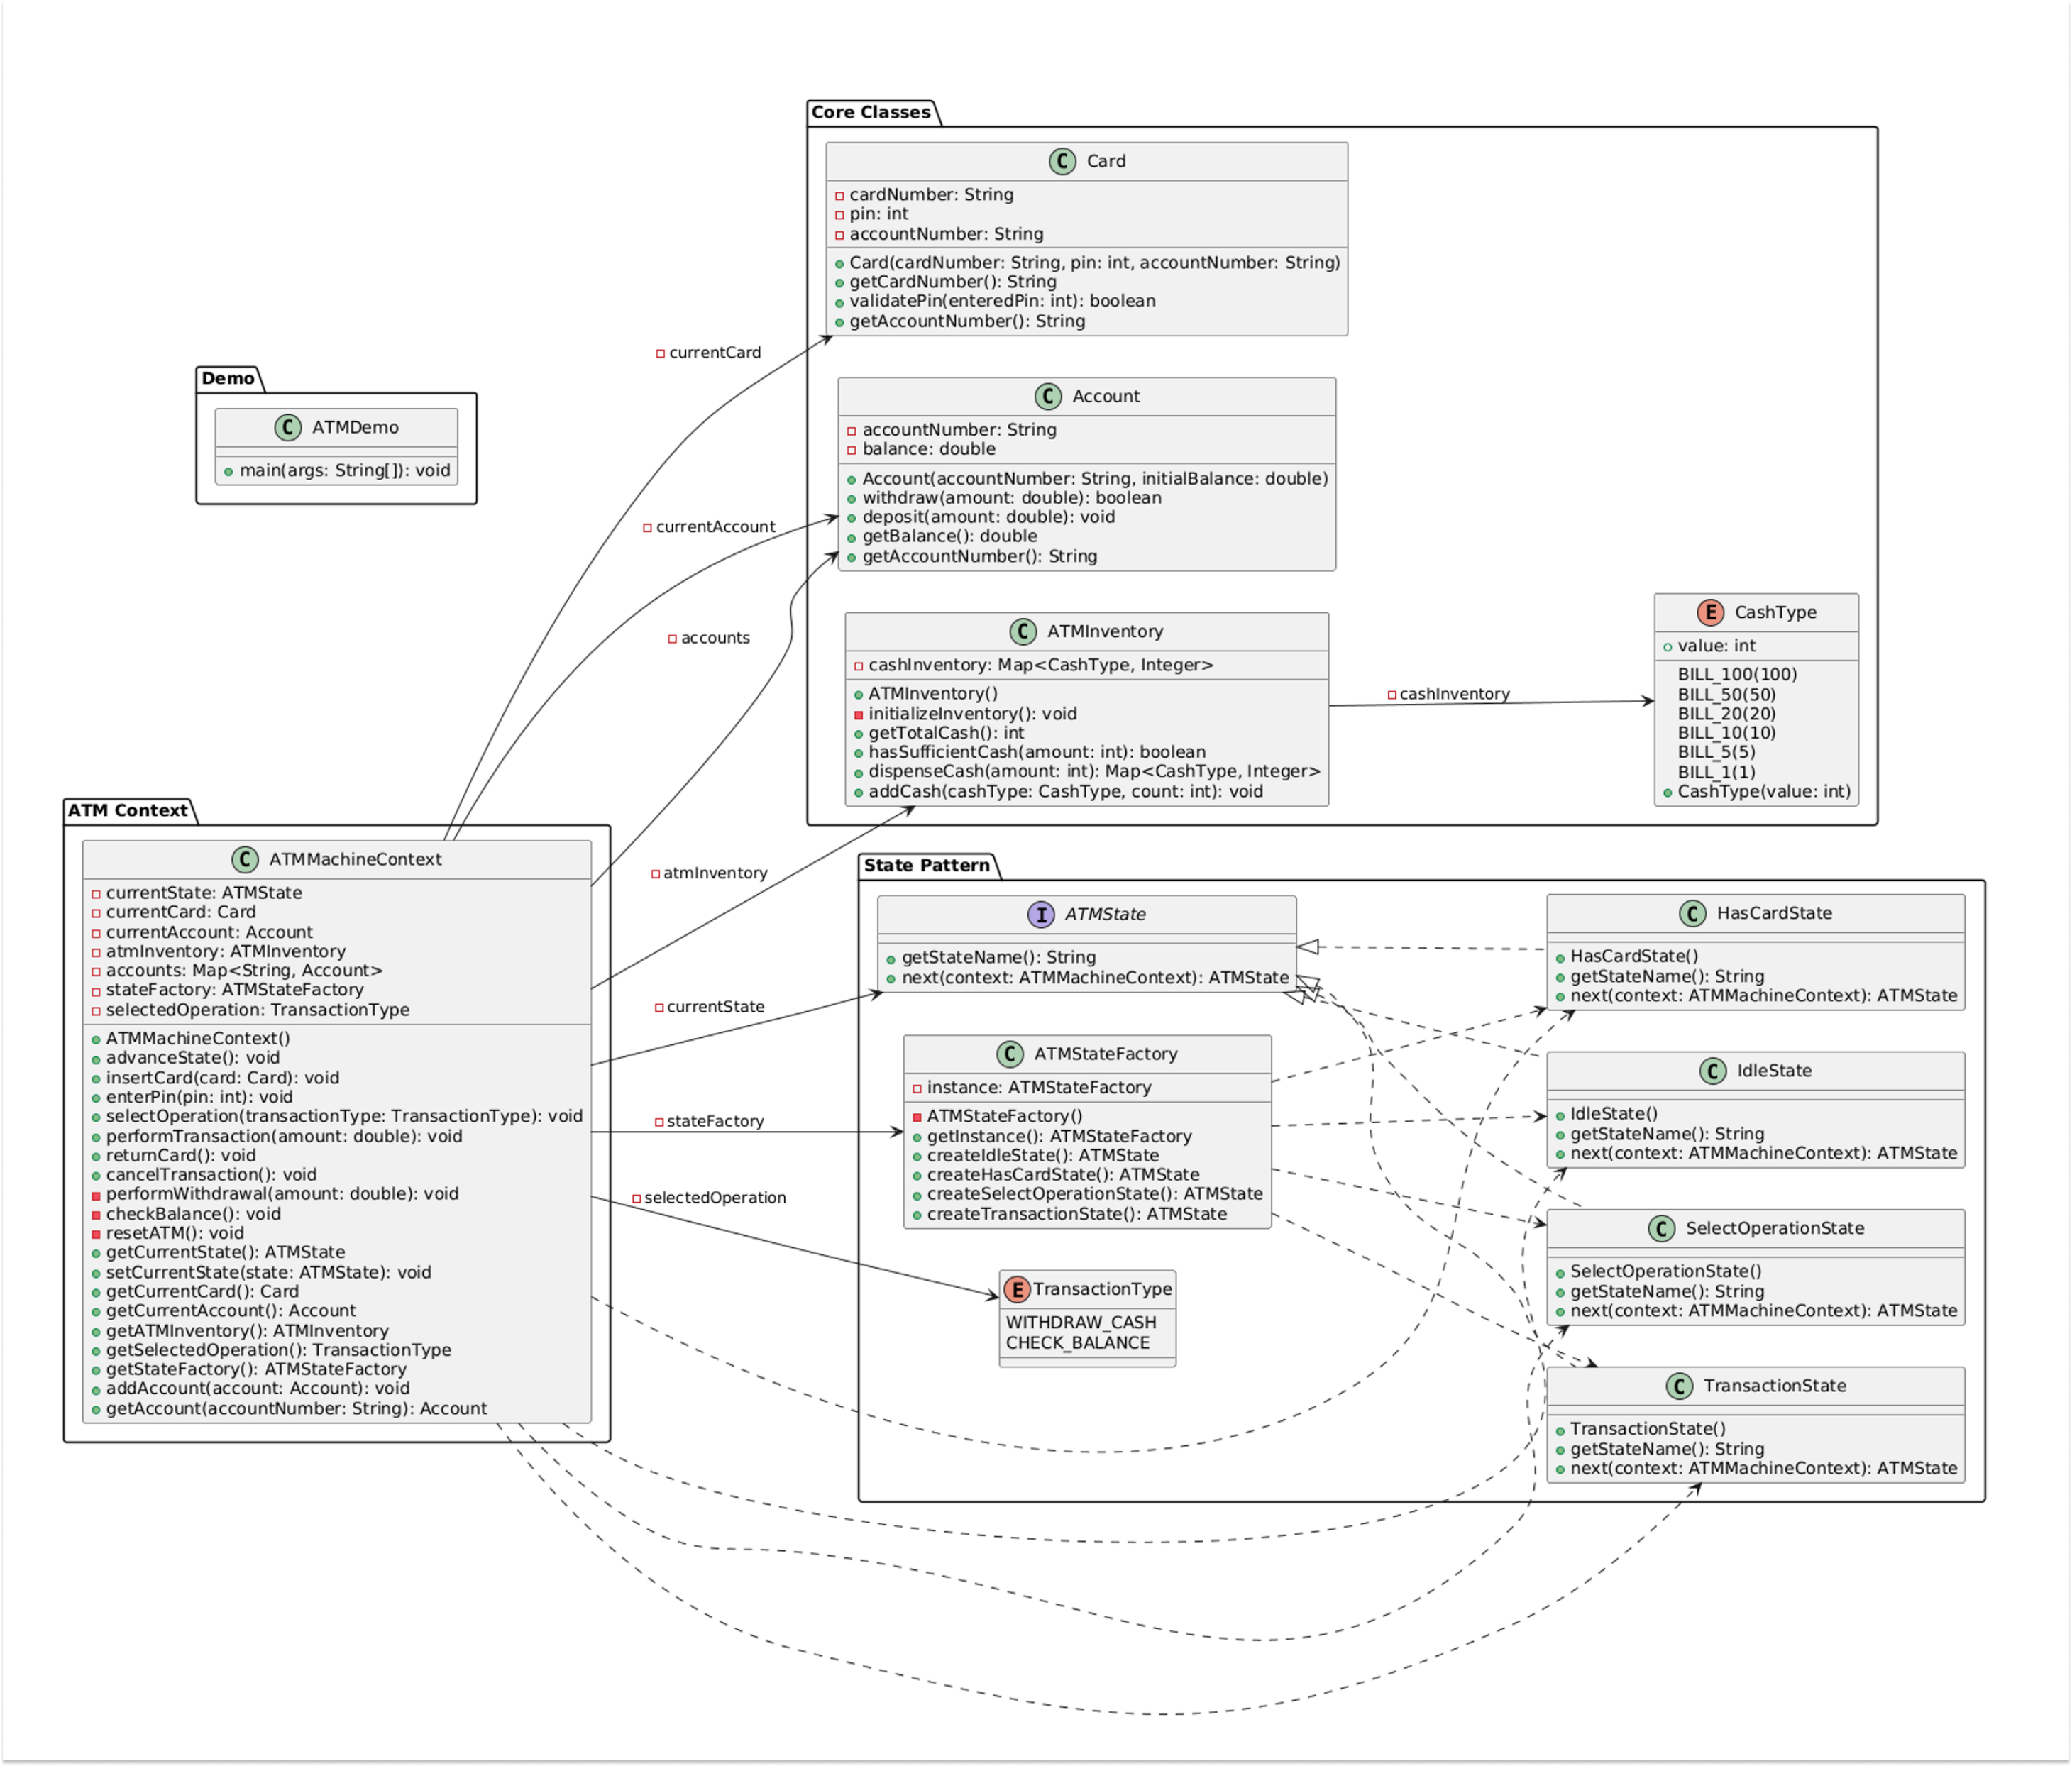
- State Diagram
- 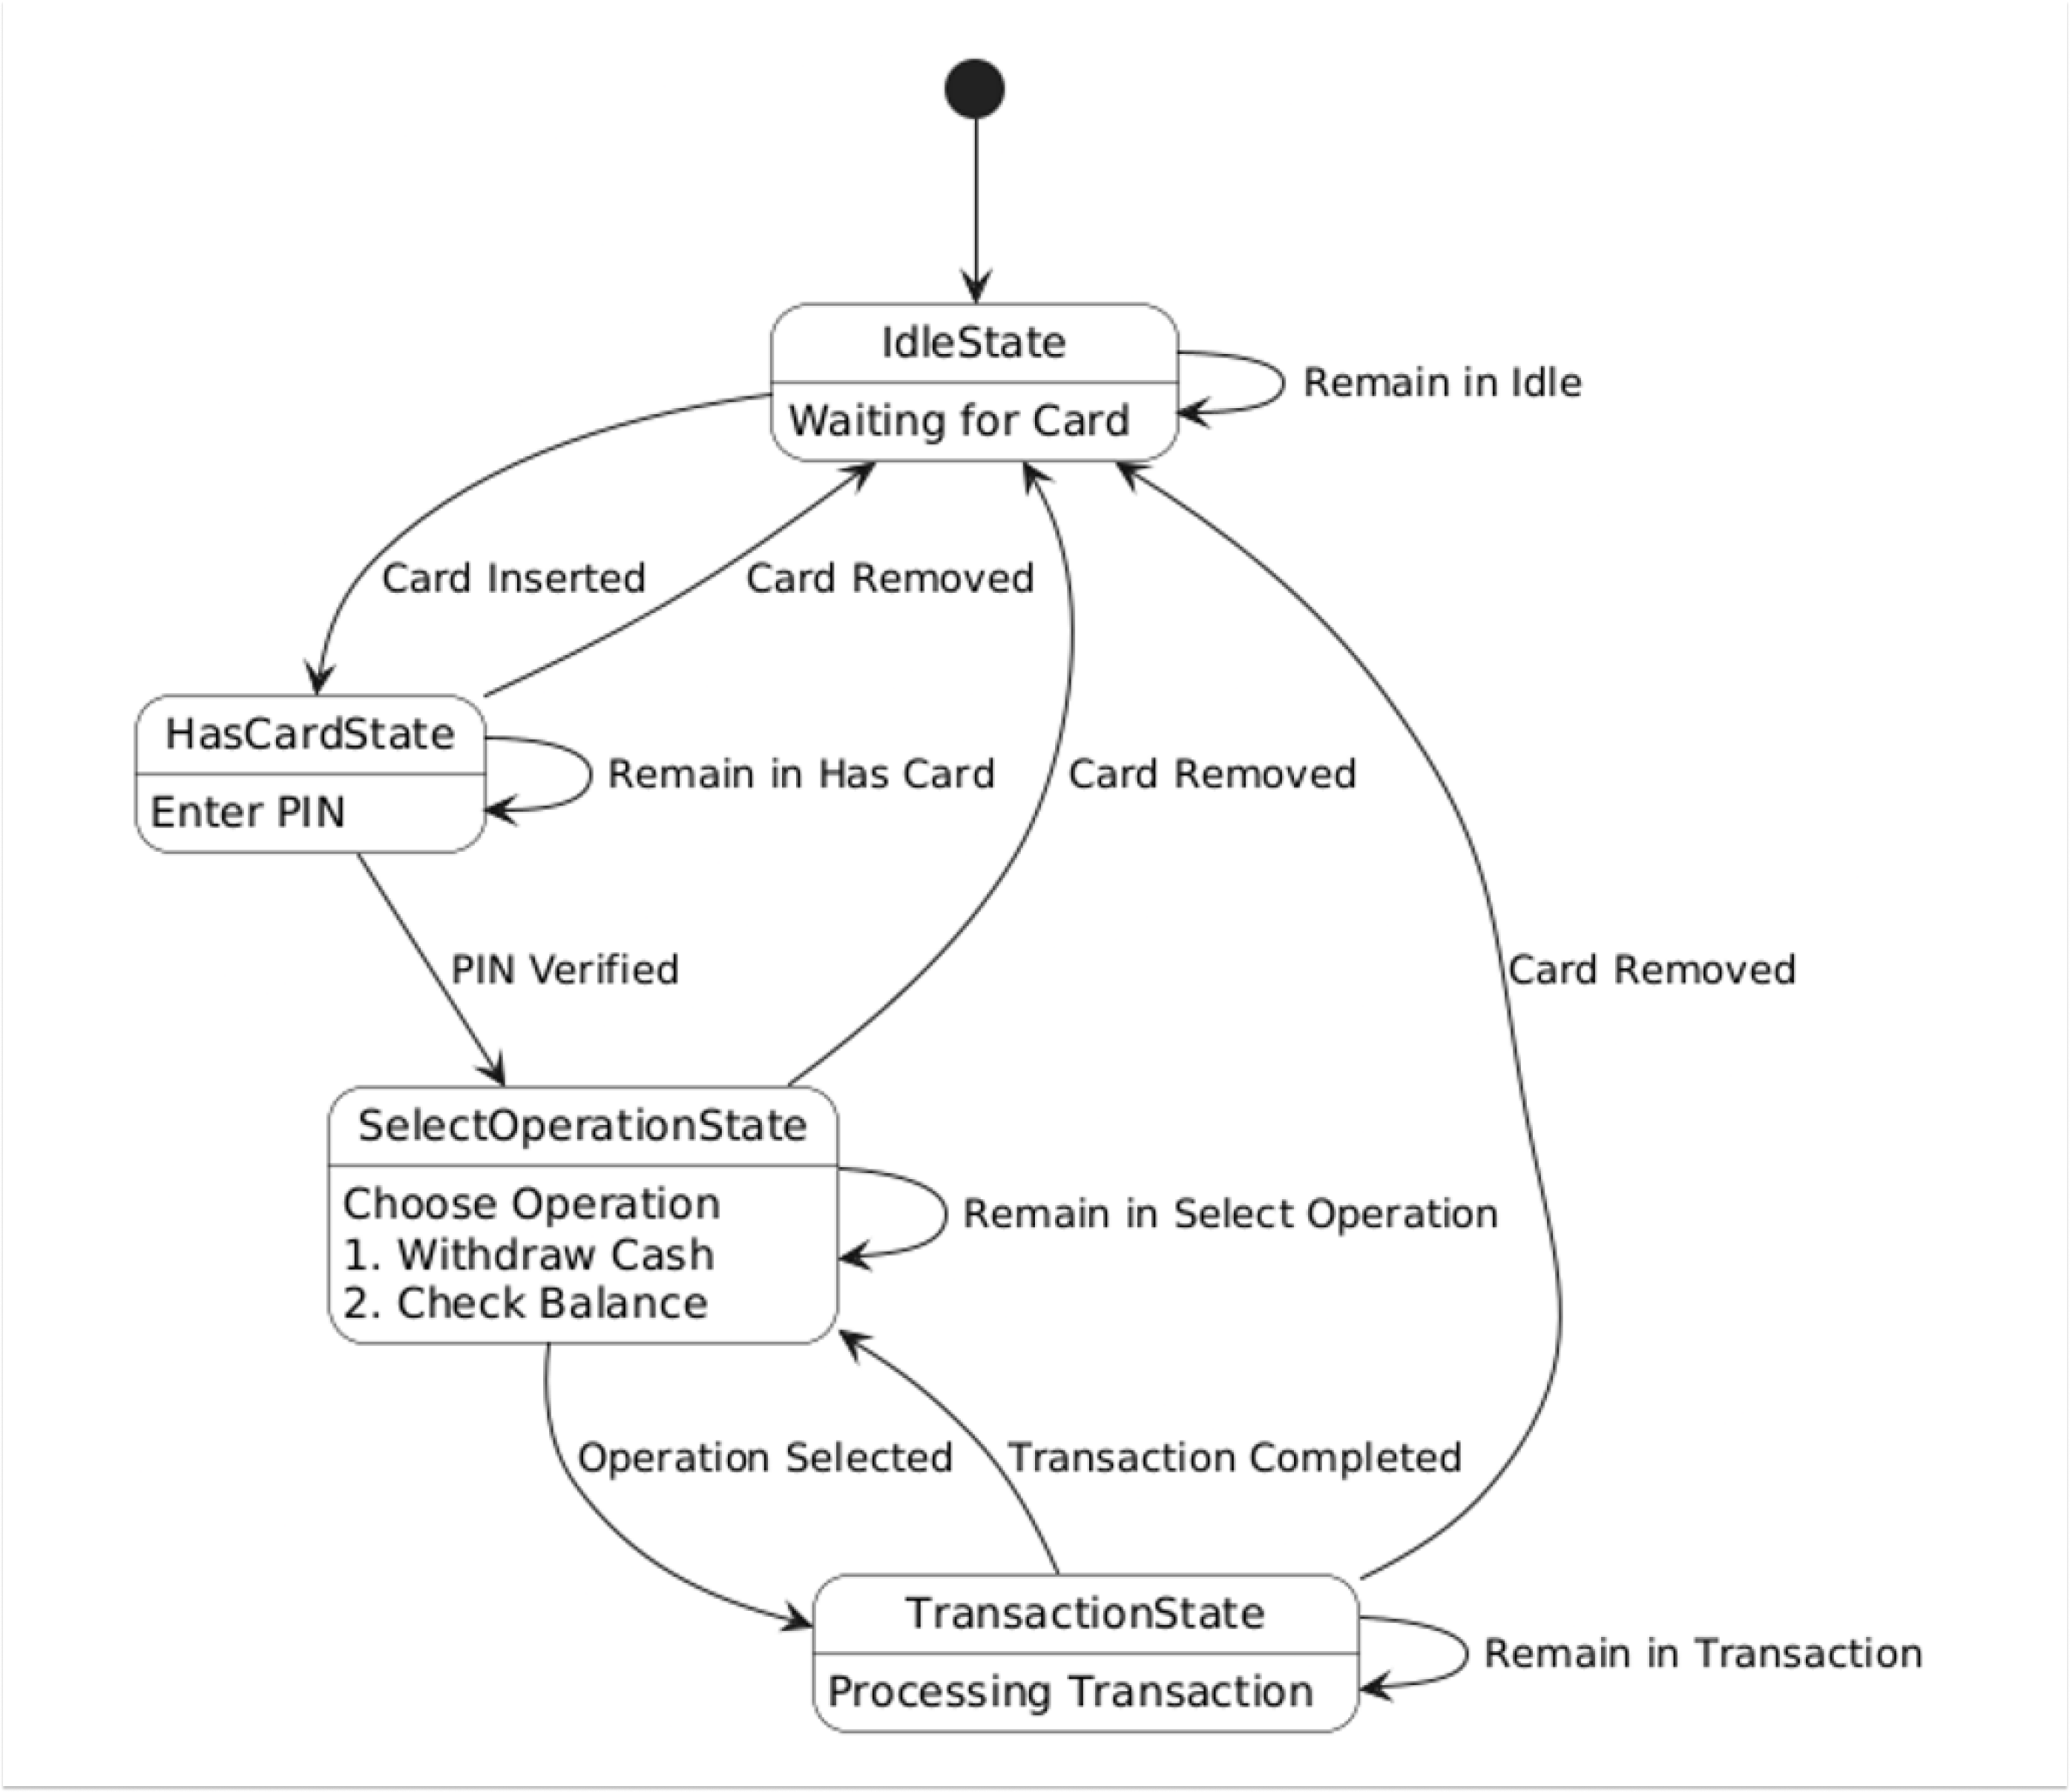

#### Implementing the core classes

In [1]:
class Card:
    def __init__(self, cardNumber: str, pin: int, accountNumber: str):
        self.cardNumber = cardNumber
        self.pin = pin
        self.accountNumber = accountNumber

    def getCardNumber(self):
        return self.cardNumber

    def validatePin(self, enteredPin: int):
        return self.pin == enteredPin

    def getAccountNumber(self):
        return self.accountNumber

In [2]:
class Account:
    def __init__(self, accountNumber: str, initialBalance: float):
        self.accountNumber = accountNumber
        self.balance = initialBalance

    def withDraw(self, amount: float):
        if self.balance >= amount:
            self.balance -= amount
            return True
        return False

    def deposit(self, amount: float):
        self.balance += amount

    def getAccountNumber(self):
        return self.accountNumber

    def getBalance(self):
        return self.balance

In [3]:
from enum import Enum

class CashType(Enum):
    BILL_100 = 100
    BILL_50 = 50
    BILL_20 = 20
    BILL_10 = 10
    BILL_5 = 5
    BILL_1 = 1

class TransactionType(Enum):
    WITHDRAWCASH = "WITHDRAWCASH"
    CHECKBALANCE = "CHECKBALANCE"

In [30]:
class ATMInventory:
    def __init__(self):
        self.cashInventory: {CashType, int} = {}
        self.initializeInventory()

    def initializeInventory(self):
        # Initialize with some cash
        self.cashInventory[CashType.BILL_100] = 10
        self.cashInventory[CashType.BILL_50] = 10
        self.cashInventory[CashType.BILL_20] = 20
        self.cashInventory[CashType.BILL_10] = 30
        self.cashInventory[CashType.BILL_5] = 40
        self.cashInventory[CashType.BILL_1] = 70


    def addCash(self, cashType: CashType, count: int):
        self.cashInventory[cashType] = count
    
    def getTotalCash(self):
        total = 0
        for cashType, count in self.cashInventory.items():
            total += cashType.value * count

        return total

    def hasSufficientCash(self, amount):
        return self.getTotalCash() >= amount

    def dispenseCash(self, amount):
        if self.hasSufficientCash(amount) == False:
            return None
            
        dispensedCash = {}
        remainingAmount = amount
        for cashType in CashType:
            available = self.cashInventory[cashType]

            count = min(remainingAmount//cashType.value, available)
            if count > 0:
                dispensedCash[cashType] = count
                remainingAmount -= count * cashType.value
                self.cashInventory[cashType] -= count

        # If we couldn;t make exact change
        if remainingAmount > 0:
            for cashType, count in dispensedCash.items():
                self.cashInventory[cashType] += count
            return None
        return dispensedCash
        

#### State Pattern for ATM states

In [31]:
from abc import ABC, abstractmethod

class ATMState(ABC):
    @abstractmethod
    def getStateName(self):
        pass

    @abstractmethod
    def next(self, context):
        pass


class IdleState(ATMState):
    def __init__(self):
        print("ATM is in Idle State - Please insert your card!")

    def getStateName(self):
        return "IdleState"

    def next(self, context):
        if context.getCurrentCard() != None:
            return context.getStateFactory().createHasCardState()
        return self

class HasCardState(ATMState):
    def __init__(self):
        print("ATM is in Has Card State - Please enter your PIN")

    def getStateName(self):
        return "HasCardState"

    def next(self, context):
        print("Current State.")
        if context.getCurrentCard() == None:
            return context.getStateFactory().createIdleState()
        if context.getCurrentAccount() != None:
            return context.getStateFactory().createSelectOperationState()
        return self

class SelectOperationState(ATMState):
    def __init__(self):
        print("ATM is in Select Operation State - Please select an operation")
        print("1. Withdraw Cash")
        print("2. Check Balance")

    def getStateName(self):
        return "SelectOperationState"

    def next(self, context):
        if context.getCurrentCard() == None:
            return context.getStateFactory().createIdleState()
        if context.getSelectedOperation() != None:
            return context.getStateFactory().createTransactionState()
        return self

class TransactionState(ATMState):
    def __init__(self):
        print("ATM is in Transaction State.")

    def getStateName(self):
        return "TransactionState"

    def next(self, context):
        if context.getCurrentCard() == None:
            return context.getStateFactory().createIdleState()
        
        return context.getStateFactory().createSelectOperationState()

In [32]:
class ATMStateFactory:
    instance = None

    def __init__(self):
        if ATMStateFactory.instance != None:
            raise Exception("Use getInstance() instead")
    @classmethod
    def getInstance(cls):
        if ATMStateFactory.instance == None:
            ATMStateFactory.instance = ATMStateFactory()
        return ATMStateFactory.instance
        
    def createIdleState(self):
        return IdleState()

    def createHasCardState(self):
        return HasCardState()

    def createSelectOperationState(self):
        return SelectOperationState()

    def createTransactionState(self):
        return TransactionState()

In [57]:
class ATMMachineContext:
    def __init__(self):
        self.stateFactory = ATMStateFactory.getInstance()
        self.currentState = self.stateFactory.createIdleState()
        self.currentCard = None
        self.currentAccount = None
        self.atmInventory = ATMInventory()
        self.accounts = {}
        self.selectedOperation = None
        print(f"ATM initialzied in: {self.currentState.getStateName()}")

    def advanceState(self):
        nextState = self.currentState.next(self)
        self.currentState = nextState
        print(f"Current State: {self.currentState.getStateName()}")

    def insertCard(self, card: Card):
        if isinstance(self.currentState, IdleState):
            print("Card Inserted")
            self.currentCard = card
            self.advanceState()
        else:
            print(f"Cannot insert card in {self.currentState.getStateName()}")

    def enterPin(self, pin: int):
        if isinstance(self.currentState, HasCardState):
            if self.currentCard.validatePin(pin):
                print("PIN authenticated successfully.")
                self.currentAccount = self.accounts[self.currentCard.getAccountNumber()]
                print(self.currentAccount.getAccountNumber())
                self.advanceState()
            else:
                print("Invalid PIN. Please try again!")
        else:
            print(f"Cannot enter PIN in {self.currentState.getStateName()}")

    def selectOperation(self, transactionType: TransactionType):
        if isinstance(self.currentState, SelectOperationState):
            print(f"Selected operation: {transactionType}")
            self.selectedOperation = transactionType
            self.advanceState()
        else:
            print(f"Cannot select operation in {self.currentState.getStateName()}")

    def performWithdrawal(self, amount):
        if self.currentAccount.withDraw(amount) == False:
            raise Exception("Insufficient funds in account.")
            
        if self.atmInventory.hasSufficientCash(amount) == False:
            # Roll back the account withdrawal
            self.currentAccount.deposit(amount)
            raise Exception("Insufficient cash in ATM")
            
        dispensedCash = self.atmInventory.dispenseCash(amount)
        if dispensedCash == None:
            # roll back the account withdrawal
            self.currentAccount.deposit(amount)
            raise Exception("Unable to dispense exact amount")
        
        print("Transaction Successful. Please collect your cash:")
        for cashType, count in dispensedCash.items():
            print(f"{cashType.value} x ${count}")

    def checkBalance(self):
        print(f"Your current balance is: ${self.currentAccount.getBalance()}")
    
    def performTransaction(self, amount=0.0):
        if isinstance(self.currentState, TransactionState):
            try:
                if self.selectedOperation == TransactionType.WITHDRAWCASH:
                    self.performWithdrawal(amount)
                elif select.selectedOperation == TransactionType.CHECKBALANCE:
                    self.checkBalance()
            except Exception as e:
                print(f"Transaction Failed")
            self.currentState = self.stateFactory.createSelectOperationState()
        else:
            print(f"Cannot perform transaction in {self.currentState.getStateName()}")

    def resetATM(self):
        self.currentCard = None
        self.currentAccount = None
        self.selectedOperation = None
        self.currentState = self.stateFactory.createIdleState()
        
    def returnCard(self):
        if isinstance(self.currentState, (HasCardState, SelectOperationState, TransactionState)):
            print("Card returned to customer")
            self.resetATM()
        else:
            print(f"No card to return in {self.currentState.getStateName()}")

    def cancelTransaction(self):
        if isinstance(self.currentState, TransactionState):
            print("Transaction Cancelled")
            self.returnCard()
        else:
            print(f"No transacton to cancel in {self.currentState.getStateName()}") 

    def getCurrentState(self):
        return self.currentState

    def setCurrentState(self, currentState):
        self.currentState = currentState

    def getCurrentCard(self):
        return self.currentCard

    def getCurrentAccount(self):
        return self.currentAccount

    def getATMInventory(self):
        return self.atmInventory

    def getSelectedOperation(self):
        return self.selectedOperation

    def getStateFactory(self):
        return self.stateFactory

    def addAccount(self, account: Account):
        self.accounts[account.getAccountNumber()] = account

    def getAccount(self, accountNmber):
        return self.accounts[accountNmber]

In [58]:
if __name__ == '__main__':
    atm = ATMMachineContext()
    account1 = Account("12345", 1000)
    account2 = Account("45678", 2000)

    # Add sample accounts
    atm.addAccount(account1)
    atm.addAccount(account2)

    try:
        print("===Starting ATM Demo===")
        card = Card("12as1s", 1234, "12345")
        atm.insertCard(card)
        atm.enterPin(1234)
        atm.selectOperation(TransactionType.WITHDRAWCASH)
        atm.performTransaction(100.0)
        atm.selectOperation(TransactionType.CHECKBALANCE)
        atm.performTransaction()
        atm.returnCard()
        print("===ATM Demo Completed")
    except Exception as e:
        print(e)

ATM is in Idle State - Please insert your card!
ATM initialzied in: IdleState
===Starting ATM Demo===
Card Inserted
ATM is in Has Card State - Please enter your PIN
Current State: HasCardState
PIN authenticated successfully.
12345
Current State.
ATM is in Select Operation State - Please select an operation
1. Withdraw Cash
2. Check Balance
Current State: SelectOperationState
Selected operation: TransactionType.WITHDRAWCASH
ATM is in Transaction State.
Current State: TransactionState
Transaction Successful. Please collect your cash:
100 x $1.0
ATM is in Select Operation State - Please select an operation
1. Withdraw Cash
2. Check Balance
Selected operation: TransactionType.CHECKBALANCE
ATM is in Transaction State.
Current State: TransactionState
Transaction Failed
ATM is in Select Operation State - Please select an operation
1. Withdraw Cash
2. Check Balance
Card returned to customer
ATM is in Idle State - Please insert your card!
===ATM Demo Completed


- 